In [390]:
import numpy as np
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pylab as plt
from matplotlib.animation import FuncAnimation
from scipy.special import binom
import scipy.integrate as cit
from itertools import combinations
import pandas as pd
import seaborn as sns
from scipy import stats
import os
from datetime import datetime
os.getcwd()
import scipy

In [391]:
sns.set()
safety = 0.3 # percent of data at safety margin left and right
window_size = 1000
Shift = 1
safetymargin = int(window_size*safety)

In [392]:
os.chdir("/home/users/t_wand01/PycharmProjects/ChangePointsForLangevin")
DF = pd.read_csv("TimeSeries_1D_Correlations.csv", index_col =0)
Dates = pd.to_datetime(DF.index,format ="%Y-%m-%d")

data = DF["Correlation"].to_numpy()

In [393]:
Data_Size = data.size

In [394]:
loop_range = np.arange(0, Data_Size - window_size +1, Shift)

In [395]:

composite_cp_result  = np.load('composite_cp_result_ws' + str(window_size) + '.npy')

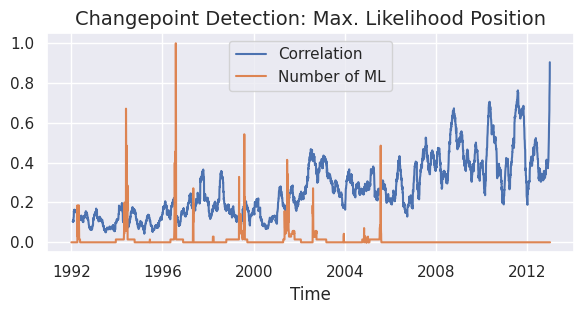

In [396]:

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates, data, label="Correlation")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")
plt.plot(Dates,composite_cp_result/max(composite_cp_result), label="Number of ML")
plt.legend()#loc= "upper right")
plt.tight_layout()

#plt.savefig('composite_cp_result_ws' + str(window_size) + '_Safety'+str(safetymargin)
#			+'_Shift'+str(window_shift) + '.pdf',bb_inches="tight", dpi=200)
plt.show()
plt.close()

In [397]:

date_time_str = '1995-12-15 00:00:00'

date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')


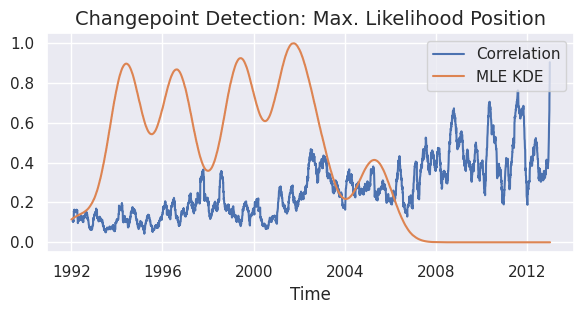

In [398]:
dfML = pd.DataFrame(data = {"Frequency": composite_cp_result})


ML_freq = pd.Series(dfML.index.repeat(dfML["Frequency"]))
kde = stats.gaussian_kde(ML_freq)
Daterange = np.arange(len(Dates))

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates,data, label="Correlation")
plt.plot(Dates, kde(Daterange) / np.max(kde(Daterange)), label="MLE KDE")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")
plt.legend()#loc= "upper right")
plt.tight_layout()
#plt.savefig('composite_cp_result_KDE_ws' + str(window_size) + '_Safety'+str(safetymargin)
#			+'_Shift'+str(window_shift) + '.pdf',bb_inches="tight", dpi=200)
plt.show()
plt.close()

In [399]:
Dates[1000]

Timestamp('1995-12-15 00:00:00')

In [400]:
#  Stepanov's Dates

Stepanovs = list()

date_time_str = '1996-03-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj)  #From spring 1996

date_time_str = '2000-03-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj)  # until spring 2000

date_time_str = '2003-07-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj)  # Spring 2000 to the second half of 2003:
 
date_time_str = '2007-10-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj)  #From the second half of 2003 until fall of 2007

date_time_str = '2009-03-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj) #From October 2007 until March 2009:

In [401]:
### CAN BE JUSTIFIED VIA EMERGENCE OF STATE 7 INSTEAD OF 6
date_time_str = '2002-07-01 00:00:00'
date_time_obj_maybe = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S') # Spring 2000 to the second half of 2003:

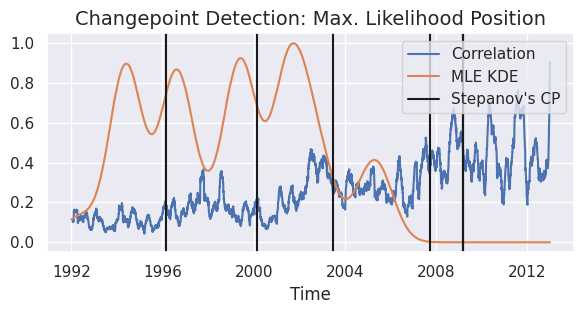

In [402]:
dfML = pd.DataFrame(data = {"Frequency": composite_cp_result})


ML_freq = pd.Series(dfML.index.repeat(dfML["Frequency"]))
kde = stats.gaussian_kde(ML_freq)
Daterange = np.arange(len(Dates))

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates,data, label="Correlation")
plt.plot(Dates, kde(Daterange) / np.max(kde(Daterange)), label="MLE KDE")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")


for d in Stepanovs:
    plt.axvline(d, c = "k", linestyle = "-")
plt.axvline(d,c="k", linestyle="-", label="Stepanov's CP")

    
plt.axvline(date_time_obj, c = "k", linestyle = "--")

plt.legend()#loc= "upper right")
plt.tight_layout()
plt.savefig('Stepanov_Comparison_ws' + str(window_size) + '_Safety'+str(safetymargin)
            +'_Shift'+str(Shift) + '.pdf', dpi=200) #,bb_inches="tight")


plt.show()
plt.close()

In [403]:
Stepanovs[0]

datetime.datetime(1996, 3, 1, 0, 0)

## Some further stuff

In [404]:

Stepanov2 = list()

date_time_str = '1994-06-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanov2.append(date_time_obj)  # Brief appearance of state 4


date_time_str = '2005-06-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanov2.append(date_time_obj)  # re-emergence of state 5

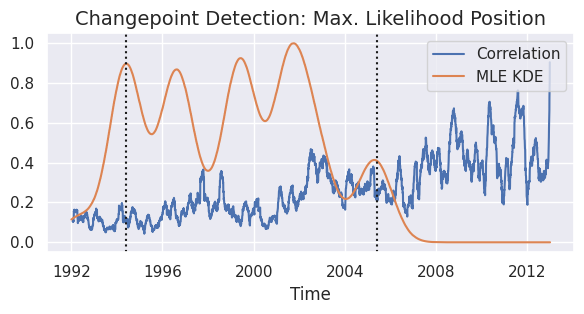

In [405]:
dfML = pd.DataFrame(data = {"Frequency": composite_cp_result})


ML_freq = pd.Series(dfML.index.repeat(dfML["Frequency"]))
kde = stats.gaussian_kde(ML_freq)
Daterange = np.arange(len(Dates))

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates,data, label="Correlation")
plt.plot(Dates, kde(Daterange) / np.max(kde(Daterange)), label="MLE KDE")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")


for d in Stepanov2:
    plt.axvline(d, c = "k", linestyle = ":")
#plt.axvline(d,c="k", linestyle="-", label="Stepanov's CP")

 

plt.legend()#loc= "upper right")
plt.tight_layout()
#plt.savefig('Stepanov_Comparison_ws' + str(window_size) + '_Safety'+str(safetymargin)
#            +'_Shift'+str(Shift) + '.pdf',bb_inches="tight", dpi=200)


plt.show()
plt.close()

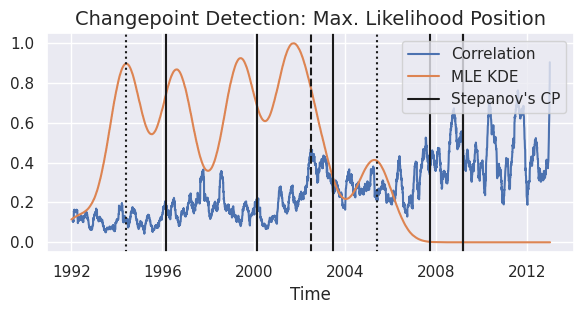

In [406]:
dfML = pd.DataFrame(data = {"Frequency": composite_cp_result})


ML_freq = pd.Series(dfML.index.repeat(dfML["Frequency"]))
kde = stats.gaussian_kde(ML_freq)
Daterange = np.arange(len(Dates))

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates,data, label="Correlation")
plt.plot(Dates, kde(Daterange) / np.max(kde(Daterange)), label="MLE KDE")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")


for d in Stepanovs:
    plt.axvline(d, c = "k", linestyle = "-")
plt.axvline(d,c="k", linestyle="-", label="Stepanov's CP")


plt.axvline(date_time_obj_maybe, c = "k", linestyle = "--")

for d in Stepanov2:
    plt.axvline(d, c = "k", linestyle = ":")
    

plt.legend()#loc= "upper right")
plt.tight_layout()
plt.savefig('Stepanov_Comparison_(2)_ws' + str(window_size) + '_Safety'+str(safetymargin)
            +'_Shift'+str(Shift) + '.pdf',dpi = 200) #bb_inches="tight", dpi=200)


plt.show()
plt.close()

## Try to redo Stepanov's Langevin Estimation

### Start with volatility g(c)

First divide the time series c(t1), c(t2), ... into windows of length 1008 days via a sliding window of 42 days (should result in approx. 100 windows). For each of those windows, divide c-values into m bins with equal number of data points inside them. Estimate g^2(c_mean) for all c_mean mean values of each bin as a second order polynomial fit in the Kramers-Moyal framework.

In [407]:
T = 1000
Tshift = 42
numbWindows = 100 # 100
m = 10 # Number of Bins
Tau_max = 5 # How many data points for 2nd order polynomial fit

In [408]:
def create_bins(array, quantiles):
    # input: 1d array of values and quantiles as breakpoints of bins
    # output: 2d array of original values (1st column) and index of bin (2nd column)

    Output = np.zeros((len(array), 2)) # one column of data, one column of bin number
    Output[:,0] = array

    for q in quantiles:
        Output[:,1] += (array > q).astype("int")
    return(Output)

In [409]:
def FitBinGsquared(C_With_Bins, I, tau_max):
    # receives 2d array of data (1st column) and bin assignment (2nd) and the index I of the bin we would like to interpolate for tau_max past data
    # returns the mean value of the bin and the interpolation for g^2 via Kramers Moyal

    tlength = C_With_Bins.shape[0] # length of the time intervals
    indices_Ith_bin = np.arange(tlength)[C_With_Bins[:,1] == I]

    mean_Ith = np.mean(C_With_Bins[indices_Ith_bin,0])  # mean value of this bin

    indices_Ith_bin = indices_Ith_bin[indices_Ith_bin + tau_max < tlength] # else the computation of the difference is out of window range

    fitting_data = np.zeros((tau_max, 3)) # used for polynomial fits
    fitting_data[:,0] = np.arange(1,tau_max+1)

    # fill fitting_data array with the mean squared difference for lag delta_tau (delta_tau = 1st column of fitting_data)
    for delta_tau in fitting_data[:,0]:
        #print(int(delta_tau)-1)
        shifted_indices = (indices_Ith_bin + delta_tau).astype("int") # shift indices to compute mean for various tau values
        fitting_data[int(delta_tau)-1,1] = np.mean((C_With_Bins[indices_Ith_bin,0]  -  C_With_Bins[shifted_indices,0])**2.) / delta_tau
        fitting_data[int(delta_tau)-1,2] = np.mean(( C_With_Bins[shifted_indices,0]- C_With_Bins[indices_Ith_bin,0])) / delta_tau # linear fit for drift


    #print(fitting_data)

    # 2nd order polynomial model
    model2nd = np.poly1d(np.polyfit(fitting_data[:,0], fitting_data[:,1], 2))
    modelDrift = np.poly1d(np.polyfit(fitting_data[:,0], fitting_data[:,1], 2))
    print(modelDrift)
    #print(model2nd)
    gsquared_estimate = model2nd(0)
    drift_estimate = modelDrift(0)
    return(np.array([mean_Ith, gsquared_estimate, drift_estimate]))

In [410]:
MeanCList = list()
GSquaredList = list() # Diffusion
FList = list()  # Drift

In [411]:
C = DF["Correlation"].to_numpy()
C = C[15:] # remove NaNs at beginning
C_Windows = np.empty((numbWindows,T))

In [412]:
for i in range(numbWindows):
    c_window = C[(i*Tshift):(i*Tshift + T)]
    C_Windows[i,:] = c_window
    Quantiles = np.quantile(c_window, np.arange(0.1,0.91,0.1)) - 0.00001

    for j in range(10):
        Binning = create_bins(c_window, Quantiles)
        FitResult = FitBinGsquared(Binning, j, Tau_max)
        MeanCList.append(FitResult[0])
        GSquaredList.append(FitResult[1])
        FList.append(FitResult[2])

            2
-4.135e-08 x + 9.271e-07 x + 2.163e-05
           2
3.296e-07 x - 2.239e-06 x + 1.692e-05
            2
-1.037e-06 x + 7.929e-06 x + 9.237e-06
           2
2.014e-07 x - 2.012e-06 x + 3.662e-05
            2
-2.905e-07 x + 6.1e-06 x + 1.685e-05
           2
5.556e-07 x - 2.711e-06 x + 2.412e-05
            2
-4.811e-07 x + 2.645e-06 x + 1.704e-05
           2
9.671e-07 x - 6.711e-06 x + 3.899e-05
            2
-1.292e-06 x + 6.359e-06 x + 5.75e-05
           2
1.861e-06 x - 5.713e-06 x + 4.316e-05
            2
-4.135e-08 x + 9.271e-07 x + 2.163e-05
           2
3.296e-07 x - 2.239e-06 x + 1.692e-05
            2
-1.037e-06 x + 7.929e-06 x + 9.237e-06
           2
2.014e-07 x - 2.012e-06 x + 3.662e-05
            2
-3.371e-07 x + 3.514e-06 x + 1.834e-05
           2
7.171e-07 x - 4.291e-06 x + 2.771e-05
            2
-4.554e-07 x + 2.686e-06 x + 1.361e-05
           2
1.022e-06 x - 4.177e-06 x + 3.389e-05
           2
5.786e-07 x - 8.792e-06 x + 8.892e-05
           2
8.3

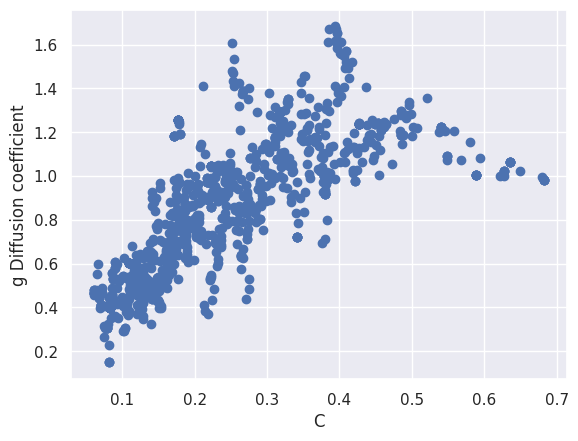

In [413]:
plt.scatter(MeanCList, np.sqrt(GSquaredList)*10**2)
plt.xlabel("C")
plt.ylabel("g Diffusion coefficient")
plt.show()

### Fit the sqrt-model for g(c)

In [414]:
def g_model(c, Lambda, cmin, cmax):

    return(Lambda*np.sqrt((c-cmin)*(cmax-c)))

In [415]:
L = 0.0245
c_min = 0.042
c_max = 0.918
crange = np.arange(c_min, c_max, 0.01)
g_hat = g_model(crange, L, c_min, c_max)

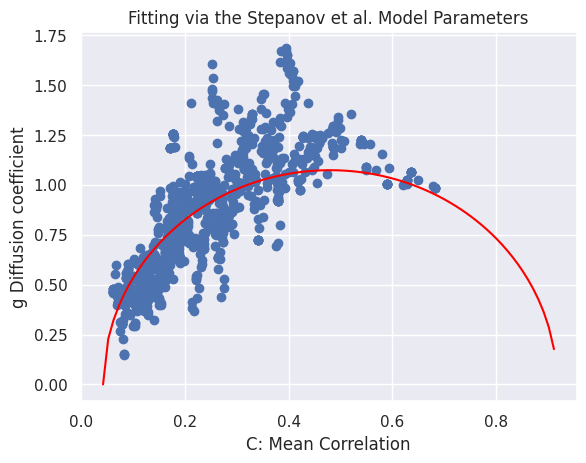

In [416]:
plt.scatter(MeanCList, np.sqrt(GSquaredList)*10**2)
plt.plot(crange, g_hat*10**2, c="red")
plt.xlabel("C: Mean Correlation")
plt.ylabel("g Diffusion coefficient")
plt.title("Fitting via the Stepanov et al. Model Parameters")
plt.show()

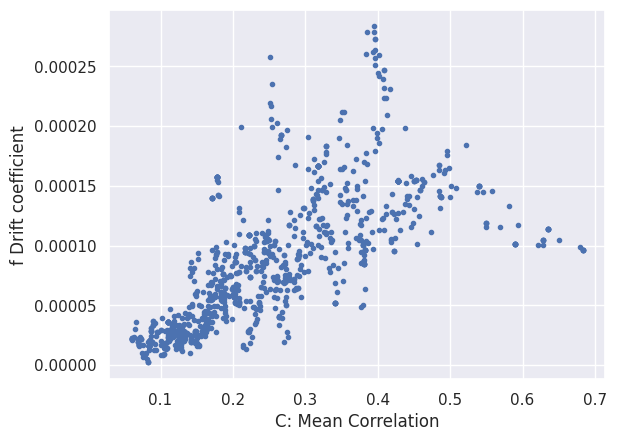

In [417]:
plt.scatter(MeanCList,FList, marker=".")
plt.xlabel("C: Mean Correlation")
plt.ylabel("f Drift coefficient")
plt.show()

## IDEA

Test for time-independence of the functional relationship f(C) via Bootstrapping and/or reassignment/shuffling of the time index:

Maybe fit a reasonable function with coefficients $\alpha_i$ to model f(C) and then

- fit $\alpha_i$ in moving time windows to see how $\alpha_i(t)$ changes
- compare this to bootstrapped $\alpha^{(B)}_i$ and see how many $\alpha_i(t)$ are in the Bootstrapped Confidence Interval
- Suitable model may be $f(C) = \alpha + \beta C + \gamma C^2 + \epsilon$ with $\epsilon \sim \mathcal{N}(0, \delta C)$ as this allows for parabolic decrease for $C>0.5$ and may account the increasing spread of $C$ for larger $C$

Standard tests for this:

- https://de.wikipedia.org/wiki/Chow-Test only 2 comparisons of linear fits
- some other tests: https://wenders.people.ua.edu/uploads/2/6/3/8/26382715/jae_paper.pdf